In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-2-9588c2c0ceaf>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()  # Isso solicitará que você envie o arquivo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv('diabetes.csv')  # Agora leia o arquivo

Saving diabetes.csv to diabetes.csv


<ipython-input-4-1e9d18cb84a2>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# Try replacing 'error_bad_lines' with 'on_bad_lines'
df = pd.read_csv('Product.csv', on_bad_lines='skip')  # 'skip' will skip bad lines
print(df)

                                                   ProductKey\tProduct\tStandard Cost\tColor\tSubcategory\tCategory\tBackground Color Format\tFont Color Format
210\tHL Road Frame - Black                           58\t$868.63\tBlack\tRoad Frames\tComponents\t...                                                          
215\tSport-100 Helmet                                Black\t$12.03\tBlack\tHelmets\tAccessories\t#...                                                          
216\tSport-100 Helmet                                Black\t$13.88\tBlack\tHelmets\tAccessories\t#...                                                          
217\tSport-100 Helmet                                Black\t$13.09\tBlack\tHelmets\tAccessories\t#...                                                          
253\tLL Road Frame - Black                           58\t$176.2\tBlack\tRoad Frames\tComponents\t#...                                                          
...                                     

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#quantidade de linhas e colunas
df.shape

(768, 9)

In [ ]:
#tipos de dados
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Qual a receita
df['Pregnancies'].sum()

2953

In [ ]:
# Calcula a matriz de correlação
correlacoes = df.corr()

# Mostra as correlações com a coluna 'Outcome' (que indica o diagnóstico de diabetes)
print(correlacoes['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


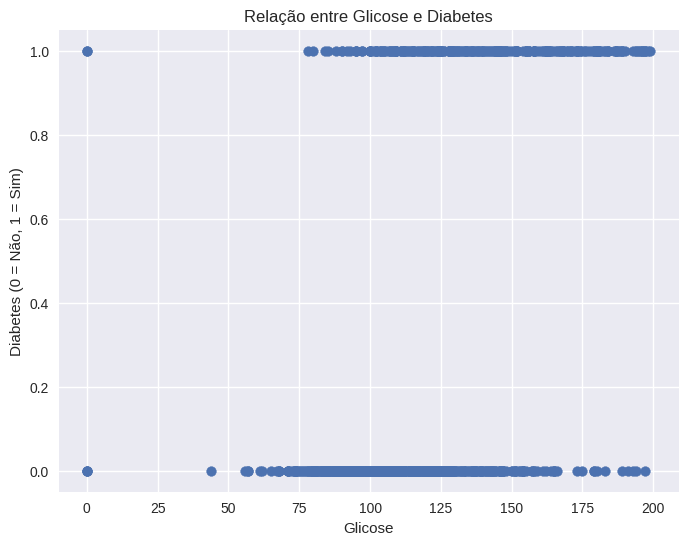

In [ ]:
# Cria um gráfico de dispersão para a variável 'Glucose'
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glicose')
plt.ylabel('Diabetes (0 = Não, 1 = Sim)')
plt.title('Relação entre Glicose e Diabetes')
plt.show()

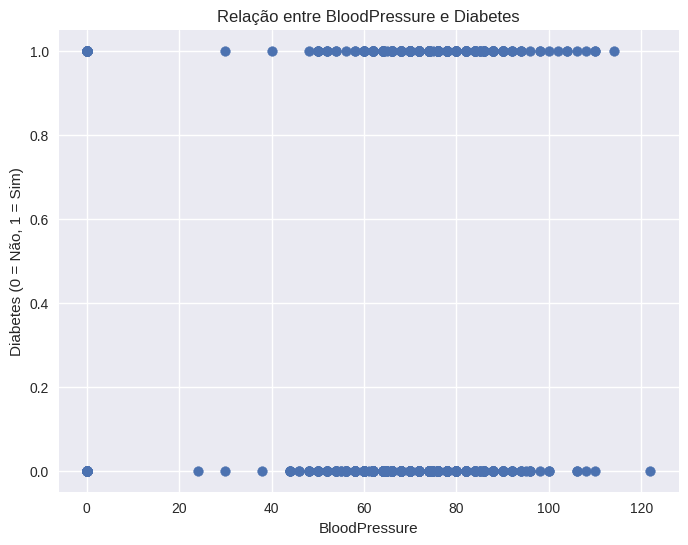

In [ ]:
# Cria um gráfico de dispersão para a variável 'BloodPressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['BloodPressure'], df['Outcome'])
plt.xlabel('BloodPressure')
plt.ylabel('Diabetes (0 = Não, 1 = Sim)')
plt.title('Relação entre BloodPressure e Diabetes')
plt.show()

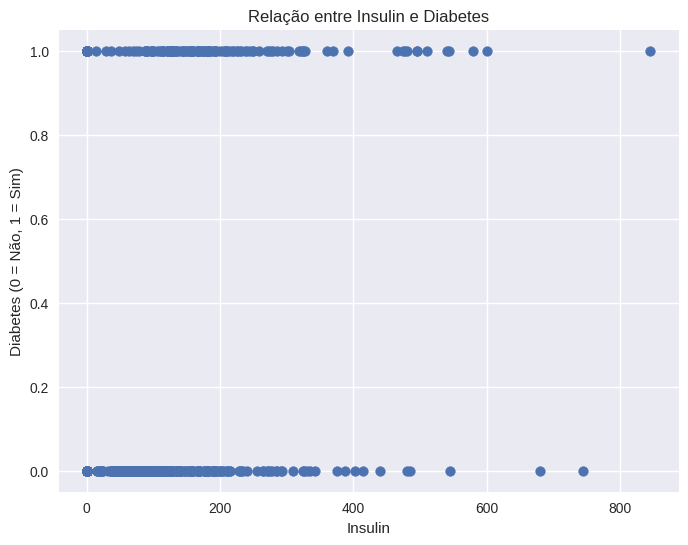

In [ ]:
# Cria um gráfico de dispersão para a variável 'Insulin'
plt.figure(figsize=(8, 6))
plt.scatter(df['Insulin'], df['Outcome'])
plt.xlabel('Insulin')
plt.ylabel('Diabetes (0 = Não, 1 = Sim)')
plt.title('Relação entre Insulin e Diabetes')
plt.show()

In [ ]:
# Verifica a correlação entre 'Pregnancies' e 'Outcome'
correlacao = df['Pregnancies'].corr(df['Outcome'])
print(correlacao)

0.22189815303398613


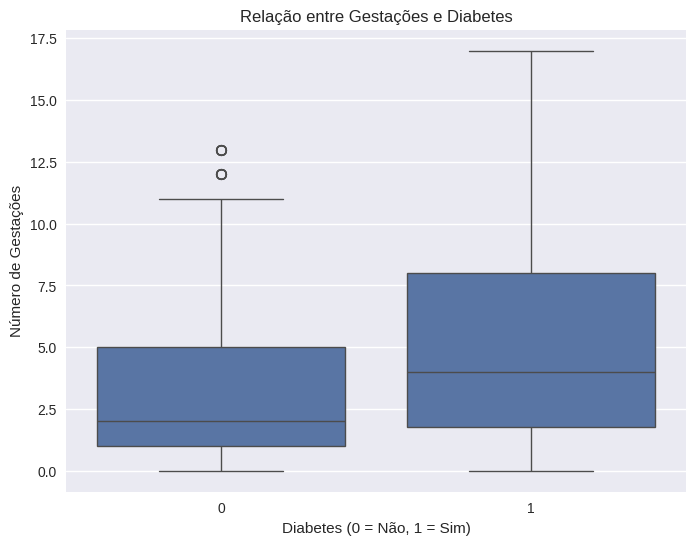

In [ ]:
# Cria um boxplot para visualizar a distribuição de 'Pregnancies' para cada grupo de 'Outcome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Gestações')
plt.title('Relação entre Gestações e Diabetes')
plt.show()

In [ ]:
# Agrupa os dados por idade e conta o número de casos de diabetes para cada idade
distribuicao_idade = df.groupby('Age')['Outcome'].sum()

# Encontra a idade com o maior número de casos
idade_mais_atingida = distribuicao_idade.idxmax()
casos_idade_mais_atingida = distribuicao_idade.max()

print(f"A idade mais atingida é {idade_mais_atingida} anos, com {casos_idade_mais_atingida} casos.")

A idade mais atingida é 25 anos, com 14 casos.


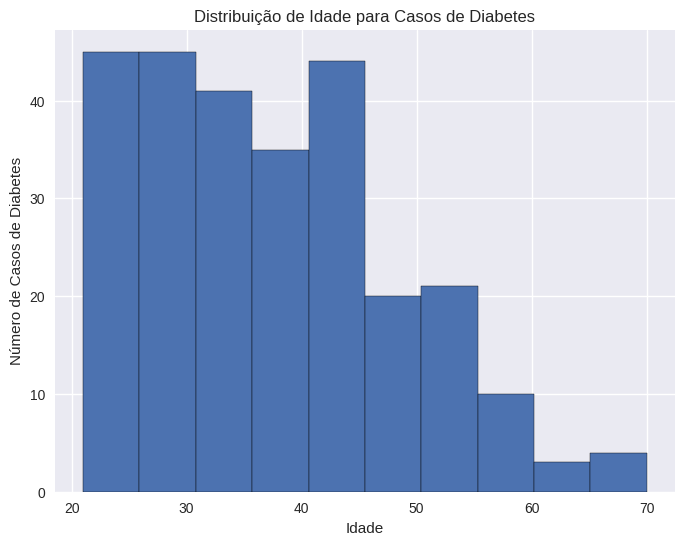

In [ ]:
# Cria um histograma da idade para os casos de diabetes (Outcome = 1)
plt.figure(figsize=(8, 6))
plt.hist(df[df['Outcome'] == 1]['Age'], bins=10, edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Número de Casos de Diabetes')
plt.title('Distribuição de Idade para Casos de Diabetes')
plt.show()